Third Task

By central limit theorem we know that $S_n \to N(0,\sqrt{n})$, therefore $\mathbb{E}(|S_n|) \sim \mathbb{E}(|N(0,\sqrt{n})|) = \sqrt{\frac{2n}{\pi}}$.

Taking $\log$ in both sides we conclude that

$\log(\mathbb{E}|S_n|) \sim \log(\sqrt{\frac{2n}{\pi}}) $.

To plot we choose bins of size $n = 2^k$ and plot $\log(\mathbb{E}|S_n|) $ as a function of $k$, so we expect that this function be similar to a line

$\log(\mathbb{E}|S_n|)  \sim \frac{1}{2}\log(2)*k + \log(\sqrt{\frac{2}{\pi}})$.

The objective of the followings simulations is to estimate this coeficient $\frac{1}{2}$ called "difusion coeficient" numerically. In the first task we did that by calculating the mean and median of samples. Now in the Third task we will study the convergence of quantiles.

 ---- diffusion constant is approximally 0.4411145247723832 using quantile 0.15 ----
 ---- diffusion constant is approximally 0.5224174942679545 using quantile 0.35 ----
 ---- diffusion constant is approximally 0.5395381184391661 using median ----
 ---- diffusion constant is approximally 0.5309057923801004 using quantile 0.65 ----
 ---- diffusion constant is approximally 0.5309057923801004 using quantile 0.85 ----
 ---- diffusion constant is approximally 0.505598780881234 using mean ----


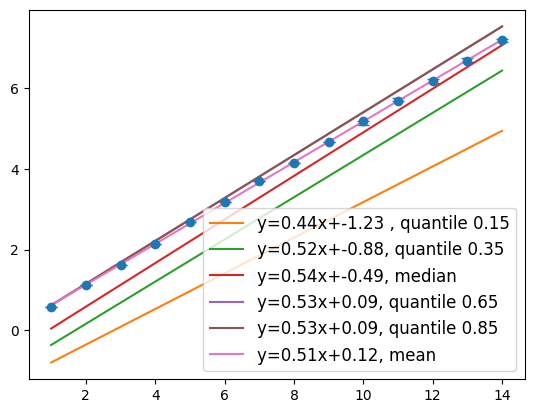

--- 364.34283924102783 seconds ---


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from scipy.stats import norm
import statistics 
import time
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator

start_time = time.time()

seed(1998)
size = 16
numbsimul = 16000
Size = np.linspace(1,size-2, size-2)

A = np.zeros((size - 2,numbsimul -1))

# simulations of random walks
for k in range(2,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-2][j-1] = x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

#quantiles
q1 = np.quantile(absA, 0.15 , 1)
q2 = np.quantile(absA, 0.35 , 1)
q3 = np.quantile(absA, 0.65 , 1)
q4 = np.quantile(absA, 0.85 , 1)

logq1 = np.log(q1)/np.log(2)
logq2 = np.log(q2)/np.log(2)
logq3 = np.log(q3)/np.log(2)
logq4 = np.log(q4)/np.log(2)
logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)

p1 = np.polyfit(Size, logq1, 1)
p2 = np.polyfit(Size, logq2, 1)
p3 = np.polyfit(Size, logq3, 1)
p4 = np.polyfit(Size, logq3, 1)
pmean = np.polyfit(Size, logmean, 1)
pmedian = np.polyfit(Size, logmedian, 1)


# calculating the interval of confidence
alpha = 0.001 # confidence level

lowerboundindex = math.floor(0.5* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
upperboundindex = math.floor(0.5* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
lowerboundindex = [lowerboundindex for i in range(size-2)]
upperboundindex = [upperboundindex for i in range(size-2)]
lowerboundheight = sortedAbs[np.arange(size-2),lowerboundindex]
upperboundheight = sortedAbs[np.arange(size-2),upperboundindex]
loglower = np.log(lowerboundheight)/np.log(2)
logupper = np.log(upperboundheight)/np.log(2)

errorbar = [np.abs(loglower-logmedian), np.abs(logupper-logmedian)]

# printing everything
print(" ---- diffusion constant is approximally %s using quantile 0.15 ----" % p1[0])
print(" ---- diffusion constant is approximally %s using quantile 0.35 ----" % p2[0])
print(" ---- diffusion constant is approximally %s using median ----" % pmedian[0])
print(" ---- diffusion constant is approximally %s using quantile 0.65 ----" % p3[0])
print(" ---- diffusion constant is approximally %s using quantile 0.85 ----" % p4[0])
print(" ---- diffusion constant is approximally %s using mean ----" % pmean[0])

# ploting graphics
plt.errorbar(Size,logmean,yerr=errorbar, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p1[1]+p1[0]*Size, label='y={:.3}x+{:.2} , quantile 0.15'.format(p1[0],p1[1]))
plt.plot(Size, p2[1]+p2[0]*Size, label='y={:.3}x+{:.2}, quantile 0.35'.format(p2[0],p2[1]))
plt.plot(Size, pmedian[1]+pmedian[0]*Size, label='y={:.3}x+{:.2}, median'.format(pmedian[0],pmedian[1]))
plt.plot(Size, p3[1]+p3[0]*Size, label='y={:.3}x+{:.2}, quantile 0.65'.format(p3[0],p3[1]))
plt.plot(Size, p4[1]+p4[0]*Size, label='y={:.3}x+{:.2}, quantile 0.85'.format(p4[0],p4[1]))
plt.plot(Size, pmean[1]+pmean[0]*Size, label='y={:.3}x+{:.2}, mean'.format(pmean[0],pmean[1]))

plt.legend(fontsize=12)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


Ploting individualy each quantile and comparing with the lines given by mean and median.

 ---- diffusion constant is approximally 0.43386626736303724 using quantile 0.15 ----
 ---- diffusion constant is approximally 0.544091057347041 using median ----
 ---- diffusion constant is approximally 0.5063036027051389 using mean ----


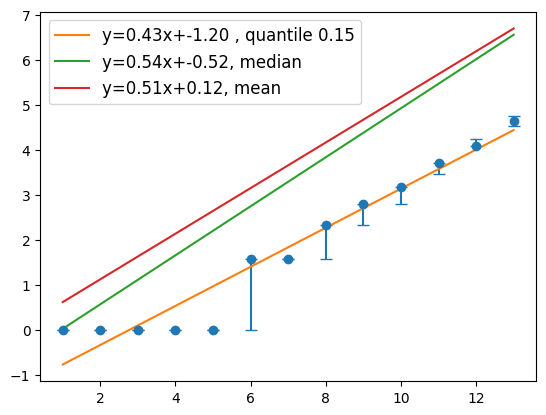

 ---- diffusion constant is approximally 0.5259283888981827 using quantile 0.35 ----
 ---- diffusion constant is approximally 0.544091057347041 using median ----
 ---- diffusion constant is approximally 0.5063036027051389 using mean ----


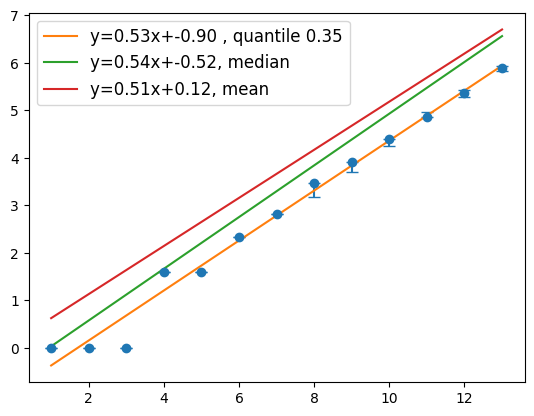

 ---- diffusion constant is approximally 0.544091057347041 using quantile 0.5 ----
 ---- diffusion constant is approximally 0.544091057347041 using median ----
 ---- diffusion constant is approximally 0.5063036027051389 using mean ----


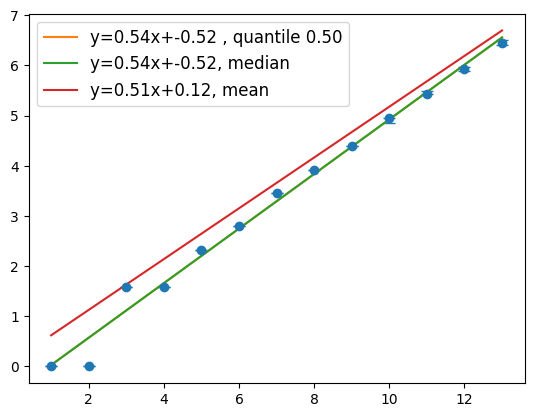

 ---- diffusion constant is approximally 0.5349756531748509 using quantile 0.65 ----
 ---- diffusion constant is approximally 0.544091057347041 using median ----
 ---- diffusion constant is approximally 0.5063036027051389 using mean ----


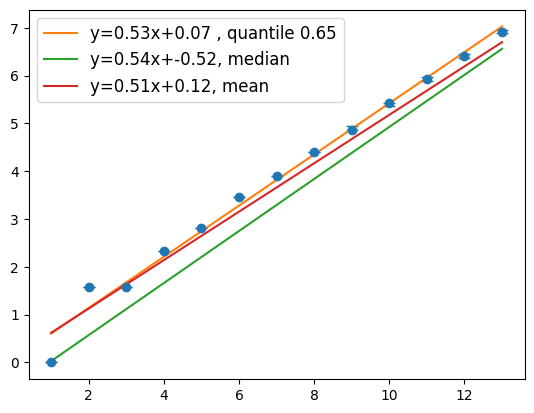

 ---- diffusion constant is approximally 0.5179795566968894 using quantile 0.85 ----
 ---- diffusion constant is approximally 0.544091057347041 using median ----
 ---- diffusion constant is approximally 0.5063036027051389 using mean ----


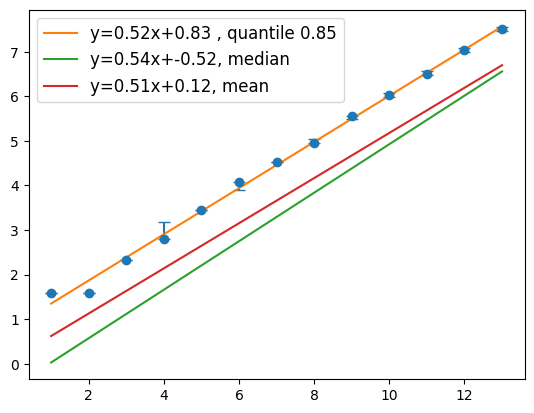

--- 123.32605385780334 seconds ---


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from scipy.stats import norm
import statistics 
import time
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
start_time = time.time()

seed(1998)
size = 15
numbsimul = 16000
Size = np.linspace(1,size-2, size-2)

A = np.zeros((size - 2,numbsimul -1))

# simulations of random walks
for k in range(2,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-2][j-1] = x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

#quantiles
q15= 0.15
q1 = np.quantile(absA, q15 , 1)

q35=0.35
q2 = np.quantile(absA, q35, 1)

q65 = 0.65
q3 = np.quantile(absA, q65,1)

q85 = 0.85
q4 = np.quantile(absA, q85 , 1)

logq15 = np.log(q1)/np.log(2)
logq35 = np.log(q2)/np.log(2)
logq65 = np.log(q3)/np.log(2)
logq85 = np.log(q4)/np.log(2)

logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)

p15 = np.polyfit(Size, logq15, 1)
p35 = np.polyfit(Size, logq35, 1)
p65 = np.polyfit(Size, logq65, 1)
p85 = np.polyfit(Size, logq85, 1)
pmean = np.polyfit(Size, logmean, 1)
pmedian = np.polyfit(Size, logmedian, 1)


# calculating the interval of confidence
alpha = 0.001 # confidence level
def confidenceinterval(q, logq):
    lowerboundindex = math.floor(q* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
    upperboundindex = math.floor(q* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
    lowerboundindex = [lowerboundindex for i in range(size-2)]
    upperboundindex = [upperboundindex for i in range(size-2)]
    lowerboundheight = sortedAbs[np.arange(size-2),lowerboundindex]
    upperboundheight = sortedAbs[np.arange(size-2),upperboundindex]
    loglower = np.log(lowerboundheight)/np.log(2)
    logupper = np.log(upperboundheight)/np.log(2)

    interval = [np.abs(loglower-logq), np.abs(logupper-logq)]
    return interval



    # printing quantile q 
def printquantile(q,logq, polynom):
    interval = confidenceinterval(q,logq)

    print(" ---- diffusion constant is approximally %s using quantile %s ----" % (polynom[0],q))
    print(" ---- diffusion constant is approximally %s using median ----" % pmedian[0])
    print(" ---- diffusion constant is approximally %s using mean ----" % pmean[0])

    # ploting graphics
    plt.errorbar(Size,logq,yerr=interval, linestyle = 'None',capsize=4, marker = 'o')
    plt.plot(Size, polynom[1]+polynom[0]*Size, label='y={:.4}x+{:.2} , quantile {:.2f}'.format(polynom[0],polynom[1], q))

    plt.plot(Size, pmedian[1]+pmedian[0]*Size, label='y={:.4}x+{:.2}, median'.format(pmedian[0],pmedian[1]))

    plt.plot(Size, pmean[1]+pmean[0]*Size, label='y={:.4}x+{:.2}, mean'.format(pmean[0],pmean[1]))

    plt.legend(fontsize=12)
    plt.show()

printquantile(q15, logq15, p15)
printquantile(q35, logq35, p35)
printquantile(0.5, logmedian, pmedian)
printquantile(q65, logq65, p65)
printquantile(q85, logq85, p85)

print("--- %s seconds ---" % (time.time() - start_time))